# Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the iris dataset & Encoding it


In [13]:
dataset = pd.read_csv("/content/drive/MyDrive/Iris.csv")
labelEncoder = LabelEncoder()
labelEncoder.fit(dataset["Species"])
dataset["Species"] = labelEncoder.transform(dataset["Species"])

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0     1            5.1           3.5            1.4           0.2        0
1     2            4.9           3.0            1.4           0.2        0
2     3            4.7           3.2            1.3           0.2        0
3     4            4.6           3.1            1.5           0.2        0
4     5            5.0           3.6            1.4           0.2        0
..  ...            ...           ...            ...           ...      ...
95   96            5.7           3.0            4.2           1.2        1
96   97            5.7           2.9            4.2           1.3        1
97   98            6.2           2.9            4.3           1.3        1
98   99            5.1           2.5            3.0           1.1        1
99  100            5.7           2.8            4.1           1.3        1

[100 rows x 6 columns]


#Mounting google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Finding the optimum number of clusters for k-means classification

In [16]:
x = dataset.iloc[:, 1:].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph,

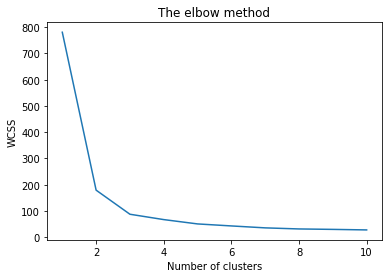

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Applying kmeans to the dataset / Creating the kmeans classifier

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


# Ploting the Cluster


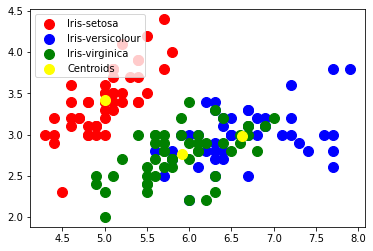

In [24]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc = "upper left")

#Ploting the clustring state

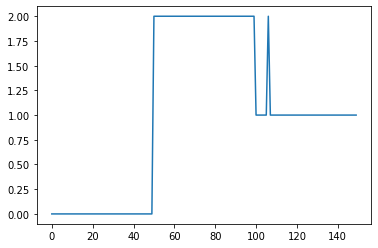

In [45]:
plt.plot(y_kmeans)
plt.show()